# LSA Demonstrator
In this tutorial, you will learn how to use Latent Semantic Analysis to either discover hidden topics from given documents in an unsupervised way 
Later you'll use LSA values as a feature vectors to classify document with known document categories.

## Imports

In [ ]:
!pip3 install nltk

You should consider upgrading via the '/Users/aumony/.pyenv/versions/3.7.4/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
#import modules
import os
import pandas as pd
import numpy as np
from string import punctuation

import nltk
from nltk import WordNetLemmatizer, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download('punkt')
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Preprocessing function

In [2]:
stop_words = nltk.corpus.stopwords.words("english")
stop_char = stop_words + list(punctuation)

In [3]:
def preprocessing(sentence):
    """ Basic processing of a document, word by word. 
    Outputs a list of processed tokens
    """
    # Tokenization
    tokens = word_tokenize(sentence)
    # stopwords + lowercase
    tokens = [token.lower().replace("'", "") for token in tokens if token.lower() not in stop_char]
    
    Lemmatizer = WordNetLemmatizer()
    tokens = [Lemmatizer.lemmatize(token) for token in tokens]
    
    # Deleting words with  only one caracter
    tokens = [token for token in tokens if len(token)>2]
    
    return tokens

## Example on few sentences

In [4]:
docA = 'I believe cats are better animals than dogs, I love cats !'
docB = 'I saw this movie named cats, it was quite bad'
docC = 'The cat jumped over the gate'

docD = 'Artificial intelligence is fun'
docE = 'Business and data science / artificial intelligence combination is the key'
docF = 'Data science is the future and data is the new black gold'
docs = [docA, docB, docC, docD, docE, docF]
docs

['I believe cats are better animals than dogs, I love cats !',
 'I saw this movie named cats, it was quite bad',
 'The cat jumped over the gate',
 'Artificial intelligence is fun',
 'Business and data science / artificial intelligence combination is the key',
 'Data science is the future and data is the new black gold']

### Preprocessing

In [5]:
simple_clean_docs = []
for doc in docs: 
    simple_clean_docs.append(preprocessing(doc))

simple_corpus = [' '.join(sentence) for sentence in simple_clean_docs]
simple_corpus

['believe cat better animal dog love cat',
 'saw movie named cat quite bad',
 'cat jumped gate',
 'artificial intelligence fun',
 'business data science artificial intelligence combination key',
 'data science future data new black gold']

### TF-IDF vectorization
To convert text data in a document-term matrix, we are goint to use `TfidfVectorizer` from `sklearn` library

In [6]:
simple_vectorizer = TfidfVectorizer()
simple_vect_corpus = simple_vectorizer.fit_transform(simple_corpus)

In [7]:
simple_dictionary = np.array(simple_vectorizer.get_feature_names())
simple_df_tfidf = pd.DataFrame(simple_vect_corpus.todense(), columns = simple_dictionary)
simple_df_tfidf.head()

,animal,artificial,bad,believe,better,black,business,cat,combination,data,dog,fun,future,gate,gold,intelligence,jumped,key,love,movie,named,new,quite,saw,science
0,0.38022,0.000000,0.000000,0.38022,0.38022,0.0,0.000000,0.526462,0.000000,0.000000,0.38022,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.38022,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.427206,0.00000,0.00000,0.0,0.000000,0.295760,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.427206,0.427206,0.0,0.427206,0.427206,0.000000
2,0.00000,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.439681,0.000000,0.000000,0.00000,0.000000,0.0,0.635091,0.0,0.000000,0.635091,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.00000,0.535506,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.653044,0.0,0.000000,0.0,0.535506,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.00000,0.343777,0.000000,0.00000,0.00000,0.0,0.419233,0.000000,0.419233,0.343777,0.00000,0.000000,0.0,0.000000,0.0,0.343777,0.000000,0.419233,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.343777


### Singular Value Decomposition

To perform Singular Value Decomposition, you can use `TruncatedSVD`. You must specify the number of topics/latent features you are expecting. Default value is set to 2. Here we will keep 2 as number of components as we are expecting to discover 2 topics regarding this corpus. Later, you'll see how to optimize this number.

In [8]:
simple_svd = TruncatedSVD(n_components=2)
simple_lsa = simple_svd.fit_transform(simple_df_tfidf)

In [9]:
simple_topic_encoded_df = pd.DataFrame(simple_lsa, columns=['topic_1', 'topic_2'])
simple_topic_encoded_df['corpus'] = simple_corpus
simple_topic_encoded_df

,topic_1,topic_2,corpus
0,0.000000e+00,7.230631e-01,believe cat better animal dog love cat
1,-1.620728e-16,5.828507e-01,saw movie named cat quite bad
2,6.039792e-17,6.972799e-01,cat jumped gate
3,6.570975e-01,-6.886393e-17,artificial intelligence fun
4,8.609304e-01,9.493220e-17,business data science artificial intelligence ...
5,5.562589e-01,2.853044e-17,data science future data new black gold


### Deep dive into dictionary

In [10]:
simple_dictionary

array(['animal', 'artificial', 'bad', 'believe', 'better', 'black',
       'business', 'cat', 'combination', 'data', 'dog', 'fun', 'future',
       'gate', 'gold', 'intelligence', 'jumped', 'key', 'love', 'movie',
       'named', 'new', 'quite', 'saw', 'science'], dtype='<U12')

In [11]:
simple_encoding_matrix = pd.DataFrame(simple_svd.components_, index=['topic_1', 'topic_2'], columns=simple_dictionary).T
simple_encoding_matrix

,topic_1,topic_2
animal,4.040341e-17,2.038379e-01
artificial,4.370256e-01,2.749934e-17
bad,-1.185139e-16,1.846156e-01
believe,4.814075e-17,2.038379e-01
better,5.375843e-17,2.038379e-01
black,1.382960e-01,2.901005e-17
business,2.434768e-01,4.666843e-17
cat,-1.252002e-16,6.373608e-01
combination,2.434768e-01,4.666843e-17
data,4.264638e-01,8.028423e-17


What are the top words for each topics ? 

In [12]:
simple_encoding_matrix['abs_topic_1'] = np.abs(simple_encoding_matrix['topic_1'])
simple_encoding_matrix['abs_topic_2'] = np.abs(simple_encoding_matrix['topic_2'])
simple_encoding_matrix.sort_values('abs_topic_1', ascending=False)

,topic_1,topic_2,abs_topic_1,abs_topic_2
artificial,4.370256e-01,2.749934e-17,4.370256e-01,2.749934e-17
intelligence,4.370256e-01,-5.092166e-19,4.370256e-01,5.092166e-19
data,4.264638e-01,8.028423e-17,4.264638e-01,8.028423e-17
science,3.130591e-01,8.761294e-17,3.130591e-01,8.761294e-17
fun,2.894720e-01,-1.076311e-16,2.894720e-01,1.076311e-16
key,2.434768e-01,4.666843e-17,2.434768e-01,4.666843e-17
business,2.434768e-01,4.666843e-17,2.434768e-01,4.666843e-17
combination,2.434768e-01,4.666843e-17,2.434768e-01,4.666843e-17
new,1.382960e-01,3.334686e-17,1.382960e-01,3.334686e-17
gold,1.382960e-01,2.901005e-17,1.382960e-01,2.901005e-17


## On larger corpus

In [13]:
nltk.download('gutenberg')
alice_raw = nltk.corpus.gutenberg.raw('carroll-alice.txt')
hamlet_raw = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


### Preprocessing

In [14]:
alice_sentences = nltk.sent_tokenize(alice_raw)

alice_sentence_clean = []
for sent in alice_sentences:
    if len(sent)>0:
        alice_sentence_clean.append(preprocessing(sent))
    
print("Number of sentences after cleaning:", len(alice_sentence_clean))
alice_sentence_clean[50]

Number of sentences after cleaning: 1625


['alice',
 'bit',
 'hurt',
 'jumped',
 'foot',
 'moment',
 'looked',
 'dark',
 'overhead',
 'another',
 'long',
 'passage',
 'white',
 'rabbit',
 'still',
 'sight',
 'hurrying']

In [15]:
hamlet_sentences = nltk.sent_tokenize(hamlet_raw)

hamlet_sentence_clean = []
for sent in hamlet_sentences:
    if len(sent)>0:
        hamlet_sentence_clean.append(preprocessing(sent))
    
print("Number of sentences after cleaning:", len(hamlet_sentence_clean))
hamlet_sentence_clean[50]

Number of sentences after cleaning: 2355


['like', 'harrowes', 'fear', 'wonder', 'barn']

### TF-IDF vectorization

In [16]:
corpus_alice = pd.concat([pd.Series((' '.join(sentence) for sentence in alice_sentence_clean), name='sentence'), 
                          pd.Series(np.ones(len(alice_sentence_clean)), name='is_Alice')], axis=1)
corpus_hamlet = pd.concat([pd.Series((' '.join(sentence) for sentence in hamlet_sentence_clean), name='sentence'), 
                          pd.Series(np.zeros(len(hamlet_sentence_clean)), name='is_Alice')], axis=1)
corpus = pd.concat([corpus_alice, corpus_hamlet]).reset_index(drop=True)

In [17]:
corpus

,sentence,is_Alice
0,alice adventure wonderland lewis carroll 1865 ...,1.0
1,rabbit-hole alice beginning get tired sitting ...,1.0
2,considering mind well could hot day made feel ...,1.0
3,nothing remarkable alice think much way hear r...,1.0
4,dear,1.0
...,...,...
3975,bid souldiers shoote,0.0
3976,exeunt,0.0
3977,marching peale ordenance shot,0.0
3978,finis,0.0


In [18]:
vectorizer = TfidfVectorizer(min_df=3)
vect_corpus = vectorizer.fit_transform(corpus['sentence'])

dictionary = np.array(vectorizer.get_feature_names())
df_tfidf = pd.DataFrame(vect_corpus.todense(), columns = dictionary)
df_tfidf.sample(5)

,aboue,absurd,accident,account,across,act,acte,action,actor,added,admiration,adue,aduice,advance,advantage,adventure,affaire,affection,affliction,afraid,after,afterwards,againe,age,ago,air,ala,alacke,alexander,alice,alive,all,allow,almost,alone,along,aloud,already,altogether,always,...,without,witness,wittenberg,woe,woman,wonder,wondering,wonderland,wont,wood,woot,word,work,worke,world,worse,worth,would,wouldst,wow,wretch,wretched,writ,write,writing,written,wrong,wrote,yea,year,yeare,yer,yes,yesterday,yet,yong,you,youl,young,youth
2572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sparsity of the matrix

- What is the dimension of the tf-idf matrix ?
- How can you explain the sparsity of the matrix ?

In [19]:
df_tfidf.shape

(3980, 1785)

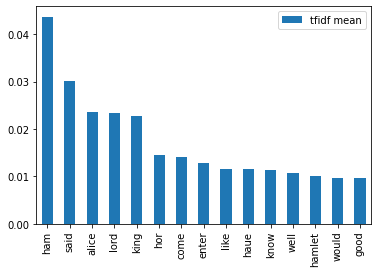

In [20]:
df_tfidf_mean = df_tfidf.mean().sort_values(ascending=False).to_frame(name='tfidf mean')
df_tfidf_mean[:15].plot(kind='bar')
plt.show()

### Singular Value Decomposition

In [21]:
svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(df_tfidf)

In [22]:
topic_encoded_df = pd.DataFrame(lsa, columns=['topic_1', 'topic_2'])
topic_encoded_df['sentence'] = corpus['sentence']
topic_encoded_df['is_Alice'] = corpus['is_Alice']
topic_encoded_df['len'] = topic_encoded_df['sentence'].str.split().str.len()
topic_encoded_df[topic_encoded_df['len']>15]

,topic_1,topic_2,sentence,is_Alice,len
1,0.003319,0.119069,rabbit-hole alice beginning get tired sitting ...,1.0,24
2,0.005391,0.056375,considering mind well could hot day made feel ...,1.0,27
6,0.003506,0.092325,thought afterwards occurred ought wondered tim...,1.0,41
8,0.004825,0.119885,rabbit-hole went straight like tunnel way dipp...,1.0,17
10,0.005065,0.059132,first tried look make coming dark see anything...,1.0,21
...,...,...,...,...,...
3951,0.009873,0.029283,dye horatio potent poyson quite ore-crowes spi...,0.0,22
3963,0.012772,0.036002,sight dismall affaire england come late eares ...,0.0,18
3968,0.006707,0.022832,shall heare carnall bloudie vnnaturall act acc...,0.0,21
3972,0.010537,0.029561,shall haue alwayes cause speake mouth whose vo...,0.0,22


### Deep dive into Dictioniary

In [23]:
dictionary[:10]

array(['aboue', 'absurd', 'accident', 'account', 'across', 'act', 'acte',
       'action', 'actor', 'added'], dtype='<U13')

In [24]:
encoding_matrix = pd.DataFrame(svd.components_, index=['topic_1', 'topic_2'], columns=dictionary).T
encoding_matrix

,topic_1,topic_2
aboue,0.000075,0.001067
absurd,0.000048,0.001157
accident,0.000083,0.000751
account,0.000038,0.003506
across,0.000040,0.001632
...,...,...
yong,0.001413,0.000794
you,0.000731,0.052400
youl,0.000019,0.000368
young,0.000882,0.005992


In [25]:
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix.sort_values('abs_topic_1', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
ham,0.965881,-0.063110,0.965881,0.063110
lord,0.244046,0.110840,0.244046,0.110840
good,0.032199,0.049682,0.032199,0.049682
hamlet,0.027003,0.025681,0.027003,0.025681
king,0.022753,0.541665,0.022753,0.541665
haue,0.021750,0.034912,0.021750,0.034912
sir,0.016344,0.025340,0.016344,0.025340
come,0.016316,0.050612,0.016316,0.050612
polon,0.011255,0.019571,0.011255,0.019571
well,0.011194,0.071411,0.011194,0.071411


In [26]:
encoding_matrix.sort_values('abs_topic_2', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
said,0.004556,0.606859,0.004556,0.606859
king,0.022753,0.541665,0.022753,0.541665
alice,0.003201,0.410652,0.003201,0.410652
lord,0.244046,0.110840,0.244046,0.110840
like,0.008615,0.079175,0.008615,0.079175
know,0.008033,0.076230,0.008033,0.076230
thought,0.003896,0.075603,0.003896,0.075603
enter,0.005339,0.075289,0.005339,0.075289
well,0.011194,0.071411,0.011194,0.071411
ham,0.965881,-0.063110,0.965881,0.063110


### Plot topic encoded data

We are going to represent each sentence regarding the two latent features. They are colorized regarding the `is_Alice` binary variable

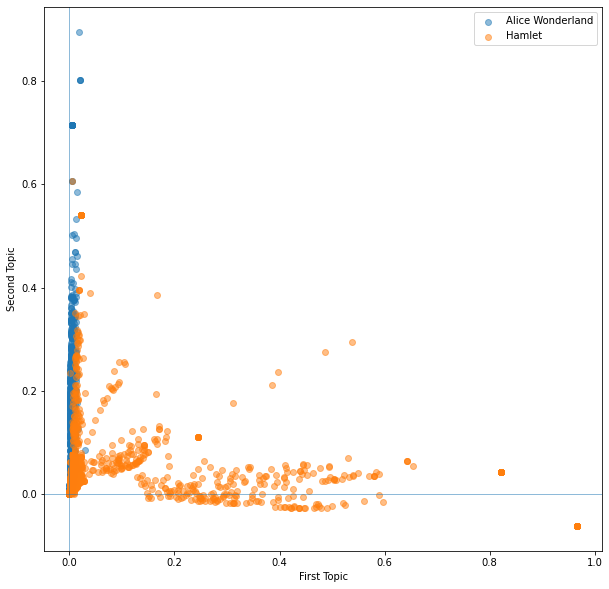

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

for val in topic_encoded_df['is_Alice'].unique():
    topic_1 = topic_encoded_df[topic_encoded_df['is_Alice']==val]['topic_1'].values
    topic_2 = topic_encoded_df[topic_encoded_df['is_Alice']==val]['topic_2'].values
    color = "red" if val else "blue"
    label= "Alice Wonderland" if val else "Hamlet"
    ax.scatter(topic_1, topic_2, alpha=0.5, label=label)
    
ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

## Select the best number of components for SVD

In [28]:
svd.explained_variance_ratio_

array([0.03091552, 0.01164008])

Create Function Calculating Number Of Components Required To Pass Threshold. 
This function have to take in parameters a large list of explained variance ratio (number of components close from number of originally features/terms)

In [29]:
def select_n_components(var_ratio, var_threshold):
    # Set initial variance explained so far
    total_variance = 0.0
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
    
        if total_variance >= var_threshold:
            break
            
    # Return the number of components
    return n_components

In [30]:
large_svd = TruncatedSVD(n_components=df_tfidf.shape[1]-1)
large_lsa = large_svd.fit_transform(df_tfidf)
threshold = 0.5
n_opt = select_n_components(large_svd.explained_variance_ratio_, threshold)
print(f"The optimal number of components to explain {threshold*100}% of the variance is {n_opt}")

The optimal number of components to explain 50.0% of the variance is 178


Text(0.5, 1.0, 'Percentage of explained variance by number of topics')

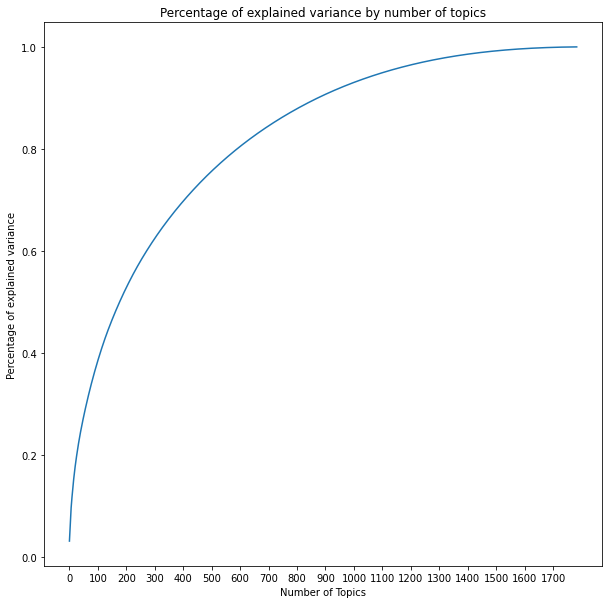

In [31]:
fig, ax = plt.subplots(figsize=(10,10))

explained_variance = pd.Series(large_svd.explained_variance_ratio_.cumsum())
explained_variance.plot()

ax.xaxis.set_ticks(np.arange(0, len(explained_variance), 100))

ax.set_xlabel('Number of Topics')
ax.set_ylabel('Percentage of explained variance')
ax.set_title('Percentage of explained variance by number of topics')

In [32]:
optimal_svd = TruncatedSVD(n_components=n_opt)
optimal_lsa = optimal_svd.fit_transform(df_tfidf)

In [33]:
optimal_encoding_matrix = pd.DataFrame(optimal_svd.components_, index=[f'topic_{i}' for i in range(n_opt)], columns=dictionary).T

In [34]:
for i in range(10):
    optimal_encoding_matrix[f'abs_topic_{i}'] = np.abs(optimal_encoding_matrix[f'topic_{i}'])
    top_words = optimal_encoding_matrix.sort_values(f'abs_topic_{i}', ascending=False).index[:5]
    print(f"Top words for topic {0} are : ")
    print(top_words)
    print()
    print()

Top words for topic 0 are : 
Index(['ham', 'lord', 'good', 'hamlet', 'king'], dtype='object')


Top words for topic 0 are : 
Index(['said', 'king', 'alice', 'lord', 'like'], dtype='object')


Top words for topic 0 are : 
Index(['king', 'said', 'alice', 'lord', 'enter'], dtype='object')


Top words for topic 0 are : 
Index(['lord', 'hor', 'king', 'ham', 'polon'], dtype='object')


Top words for topic 0 are : 
Index(['hor', 'lord', 'king', 'ham', 'polon'], dtype='object')


Top words for topic 0 are : 
Index(['enter', 'hamlet', 'king', 'polonius', 'horatio'], dtype='object')


Top words for topic 0 are : 
Index(['ophe', 'come', 'laer', 'said', 'haue'], dtype='object')


Top words for topic 0 are : 
Index(['ophe', 'come', 'laer', 'let', 'said'], dtype='object')


Top words for topic 0 are : 
Index(['pol', 'come', 'laer', 'well', 'know'], dtype='object')


Top words for topic 0 are : 
Index(['laer', 'pol', 'said', 'come', 'alice'], dtype='object')


